## Projekt Neuronales Netzwerk

### 1. Keras und Tensorflow installieren

- Keras ist in Tensorflow Integriert worden.
- Keras ist in Python entwickelt, Tensorflow in C++
- Keras komofrtabele Schnittstelle um auf Tensorflow zuzugreifen
- es reicht aus, Tensorflow zu installieren.
- Tensorflow läuft nur mit Python bis zur Version 3.12.

In [1]:
!pip3 install tensorflow


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import keras

In [3]:
keras.__version__

'3.8.0'

### 2. Die Daten

Datenbank: FASHIONMNIST

- 10 Kategorien: 
  - T-Shirt
  - Trousers
  - Dress
  - Coat
  - Sandale
  - Shirt
  - Pullover
  - Sneaker
  - Bag
- jedes Bild ist 28 x 28 Pixel groß
- Bilder in Graustufen

Beispiele:

![](/Users/martin/Workspace/Jupyter_Notebooks/Info_KS/6_Artificial_Intelligence/images/The-FashionMNIST-dataset-consists-of-10-classes-of-monochrome-clothing-items-and-is.png){width=400px}


### 3. Aufbau eines neuronales Netzwerk zur Erkennung eines T-Shirts.

- Entscheidungsfrage: Ist auf dem Bild ein T-Shirt zu sehen oder nicht?
- Aufbau:
  - Eingans-Layer: 28 x 28 Pixel, dh. 28*28=784 Eingänge
  - Hidden Layer: 100 Neuronen
  - Output-Layer: 1 Neuron mit der Ausgabe, ob es sich um ein T-Shirt handelt (1) oder nicht (0)
  

#### 3.1. Bilder einlesen

In [5]:
import gzip
import numpy as np 

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)



Ein Numpy Array wird erzeugt mit den eingelesenen Werten

In [6]:
#Daten einlesen
x_training = open_images("train-images-idx3-ubyte.gz")

In [7]:
x_training

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
x_training.shape

(60000, 28, 28)

#### 3.2 Exkurs - Numpy-Array


- Modulimport 
  ```python 
  import numpy as np
  ```
- Numpy-Array
  - effizienter als Python-Listen
  - zusätzliche Operationen
  - Matrixausgabe möglich

In [ ]:
a=np.array([1,2,3,4])
print (a)
print(a*2)
print(a+3)
print(a+a)
print(a*a)
matrix = np.array([[1,2,3],[4,5,6]])

print(matrix)
print(matrix[0,1])
print(matrix[:,1])


In [ ]:
!pip3 install matplotlib

#### 3.2 Exkurs - Ende

<function matplotlib.pyplot.show(close=None, block=None)>

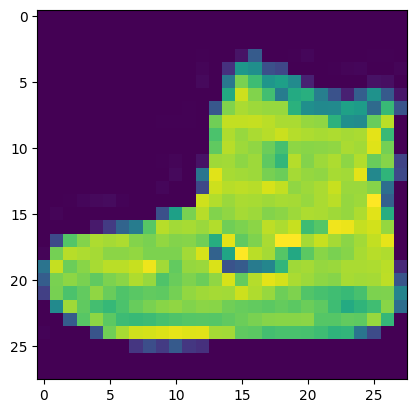

In [17]:
#%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(x_training[0])
#plt.imshow(x_training[1])
#plt.imshow(X_training[2], cmap="gray_r")
plt.show

#### 3.4. Modell erstellen

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model1 = Sequential()
model1.add(Dense(100, activation="sigmoid",input_shape=(784,))) #Hidden Layer wird zugefügt mit allen Gewichten definiert und 100 Neuronen
model1.add(Dense(1,activation="sigmoid"))

model1.compile(optimizer="sgd", loss="binary_crossentropy")
#wichtig für Compilierung eines effizienten Codes



/Users/martin/.pyenv/versions/3.12.6/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4. Modell trainieren




#### 3.1 Form der Daten

In [15]:
x_training[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,  13.,  73.,   0.,   0.,   1.,   4.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,  36., 136., 127.,  62.,  54.,   0.,   0.,   0.,
          1.,   3.,   4.,   0.,   0.,   3.],
       [  0.,   0.,   0.,   0.,   0

Daten müssen angepasst in der Form angepasst. Wir brauchen 60000 Datenstränge, die 784 Daten enthält. Dafür benutzen wir die Funktion `reshape`

In [16]:

model1.fit(x_training.reshape(60000, 784),
           y_training,
           epoche = 10,
           batch_size =1000)

NameError: name 'y_training' is not defined

#### 3.2 Form der Label 

In [18]:
#Label einlesen 
y_training = open_labels("train-labels-idx1-ubyte.gz")

In [19]:
# Label anzeigen
y_training

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Schreibe dort True rein, wo im Array 0 steht (=T-Shirt)


In [22]:
y_training == 0

array([False,  True,  True, ..., False,  True, False])

### 4. Vorhersage

In [ ]:
model1.predict(x_training[1]reshape(1,784))

In [ ]:
y_training_predict = model1.predict(x_training.reshape(60000, 784))

In [ ]:
np.round(y_training_prediction)
